In [35]:
import  numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score, recall_score,confusion_matrix,f1_score,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
data=pd.read_csv('diabetes.csv')

In [147]:
data.sample(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
188,70,Male,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,No,Positive
370,45,Male,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,Negative
86,38,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Positive
426,54,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Positive
353,60,Male,No,No,No,Yes,No,No,No,No,No,No,Yes,Yes,No,No,Negative
26,42,Male,No,No,No,Yes,Yes,No,No,No,Yes,No,No,Yes,No,No,Positive
250,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,No,Positive
472,72,Male,Yes,No,No,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Negative
146,39,Male,Yes,Yes,No,No,No,Yes,No,Yes,No,No,No,Yes,No,Yes,Positive
298,39,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive


In [5]:
data["class"].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [7]:
data.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [8]:
data.describe(include='all')

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,NaN,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,NaN,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320
mean,48.028846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,12.151466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,47.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# data preprocessing
data.nunique()

Age                   51
Gender                 2
Polyuria               2
Polydipsia             2
sudden weight loss     2
weakness               2
Polyphagia             2
Genital thrush         2
visual blurring        2
Itching                2
Irritability           2
delayed healing        2
partial paresis        2
muscle stiffness       2
Alopecia               2
Obesity                2
class                  2
dtype: int64

In [10]:
df=data.copy()

In [11]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


#  Converting categorical data into Numerical data

In [81]:
df['Gender'] = df ['Gender'].replace({'Female':0,'Male':1 })

In [82]:
df['Gender']

0      1
1      1
2      1
3      1
4      1
      ..
515    0
516    0
517    0
518    0
519    1
Name: Gender, Length: 520, dtype: int64

In [83]:
for column in df.columns.drop(['Age','Gender','class']):
     df[column]= df[column].replace({'No':0 , 'Yes': 1})

In [91]:
df['class'] = df ['class'].replace({'Positive':0,'Negative':1 })

In [93]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,0
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,0
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,0
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,0
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1


#    Correlation matrix

In [17]:
#Correlation
df.corr()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
Age,1.000000,0.062872,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,-0.108679
Gender,0.062872,1.000000,-0.268894,-0.312262,-0.281840,-0.124490,-0.219968,0.208961,-0.208092,-0.052496,-0.013735,-0.101978,-0.332288,-0.090542,0.327871,-0.005396,0.449233
Polyuria,0.199781,-0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,-0.665922
Polydipsia,0.137382,-0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,-0.648734
sudden weight loss,0.064808,-0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,-0.436568
weakness,0.224596,-0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,-0.243275
Polyphagia,0.315577,-0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,-0.342504
Genital thrush,0.096519,0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,-0.110288
visual blurring,0.402729,-0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,-0.251300
Itching,0.296559,-0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,0.013384


<AxesSubplot:>

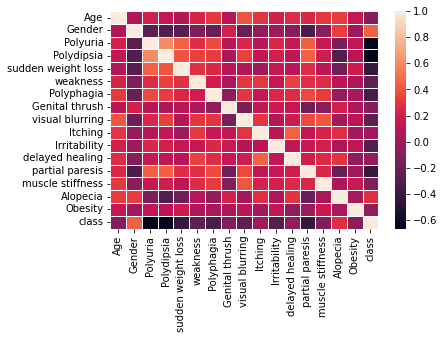

In [19]:
#HEATMAP
sns.heatmap(df.corr(),linewidths=.5)

C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

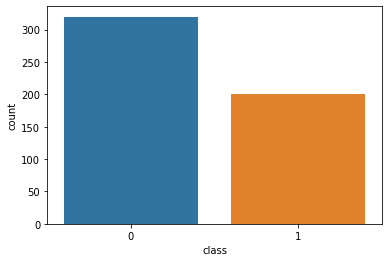

In [158]:
sns.countplot(df['class'])

# Separation of data

In [27]:
y=df["class"]
X=df.drop("class", axis=1)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,shuffle=True,random_state=123) 

# Scalling the data

In [29]:
scaler=StandardScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train),index=X_train.index , columns=X_train.columns)

In [30]:
X_train

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
42,0.203401,-1.290994,-0.980951,1.122884,-0.856349,0.864812,1.090630,-0.551430,1.128372,1.03923,1.766016,1.117429,1.145038,1.311089,-0.727607,-0.449791
376,-0.393078,0.774597,-0.980951,-0.890564,-0.856349,0.864812,-0.916901,1.813466,-0.886232,1.03923,-0.566246,1.117429,-0.873334,-0.762725,1.374369,-0.449791
184,0.032978,-1.290994,1.019419,1.122884,1.167748,-1.156321,1.090630,1.813466,-0.886232,-0.96225,1.766016,1.117429,-0.873334,1.311089,1.374369,2.223254
41,0.203401,-1.290994,1.019419,1.122884,1.167748,-1.156321,1.090630,-0.551430,-0.886232,-0.96225,-0.566246,1.117429,1.145038,-0.762725,-0.727607,-0.449791
494,-0.989557,0.774597,-0.980951,-0.890564,-0.856349,-1.156321,-0.916901,-0.551430,-0.886232,-0.96225,-0.566246,-0.894911,-0.873334,-0.762725,-0.727607,-0.449791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,-1.074768,-1.290994,1.019419,1.122884,-0.856349,-1.156321,-0.916901,-0.551430,1.128372,-0.96225,-0.566246,-0.894911,-0.873334,-0.762725,1.374369,-0.449791
322,1.396359,0.774597,-0.980951,-0.890564,-0.856349,0.864812,1.090630,-0.551430,1.128372,1.03923,1.766016,1.117429,-0.873334,1.311089,1.374369,-0.449791
382,1.737204,0.774597,1.019419,1.122884,-0.856349,-1.156321,1.090630,-0.551430,1.128372,1.03923,1.766016,-0.894911,1.145038,-0.762725,-0.727607,-0.449791
365,-0.222655,-1.290994,-0.980951,-0.890564,-0.856349,-1.156321,1.090630,-0.551430,1.128372,1.03923,-0.566246,-0.894911,1.145038,-0.762725,-0.727607,-0.449791


In [95]:
y_train

42     0
376    1
184    0
41     0
494    1
      ..
98     0
322    1
382    0
365    0
510    1
Name: class, Length: 416, dtype: int64

# Applying the Model

# Logistic regression

In [32]:
y_train.unique()

array([0, 1], dtype=int64)

In [96]:
model_1=LogisticRegression()
model_1.fit(X_train,y_train)
print("Train_score    :",model.score(X_train,y_train)*100)
print("Test_score     :",model.score(X_test,y_test)*100)

Train_score    : 93.50961538461539
Test_score     : 36.53846153846153


In [97]:
y_pred_1=model_1.predict(X_test)

In [98]:
y_pred_1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [99]:
print("confusion matrix :\n",confusion_matrix(y_test,y_pred_1))

confusion matrix :
 [[ 0 66]
 [ 0 38]]


In [100]:
#PRECISION
print("Precesion : ",precision_score(y_test,y_pred_1))

Precesion :  0.36538461538461536


In [101]:
#RECALL
print("precision :",recall_score(y_test,y_pred_1))

precision : 1.0


In [102]:
# F1 SCORE
print("F1 Score : ",f1_score(y_test,y_pred_1))

F1 Score :  0.5352112676056338


# DecisionTree Model

In [103]:
model_2=DecisionTreeClassifier()
model_2.fit(X_train,y_train)
print("Train_score    :",model_2.score(X_train,y_train)*100)
print("Test_score     :",model_2.score(X_test,y_test)*100)

Train_score    : 100.0
Test_score     : 87.5


In [104]:
y_pred2=model_2.predict(X_test)

In [105]:
print("confusion matrix :\n",confusion_matrix(y_test,y_pred2))

#PRECISION
print("Precesion : ",precision_score(y_test,y_pred2))

#RECALL
print("precision :",recall_score(y_test,y_pred2))

# F1 SCORE
print("F1 Score : ",f1_score(y_test,y_pred2))

confusion matrix :
 [[57  9]
 [ 4 34]]
Precesion :  0.7906976744186046
precision : 0.8947368421052632
F1 Score :  0.8395061728395061


In [165]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90        66
           1       0.79      0.89      0.84        38

    accuracy                           0.88       104
   macro avg       0.86      0.88      0.87       104
weighted avg       0.88      0.88      0.88       104



# KNeighbors Model

In [106]:
model_3=KNeighborsClassifier()
model_3.fit(X_train,y_train)
print("Train_score    :",model_3.score(X_train,y_train)*100)
print("Test_score     :",model_3.score(X_test,y_test)*100)

Train_score    : 94.71153846153845
Test_score     : 65.38461538461539


In [108]:
y_pred3=model_3.predict(X_test)

In [109]:
print("confusion matrix :\n",confusion_matrix(y_test,y_pred3))

#PRECISION
print("Precesion : ",precision_score(y_test,y_pred3))

#RECALL
print("precision :",recall_score(y_test,y_pred3))

# F1 SCORE
print("F1 Score : ",f1_score(y_test,y_pred3))

confusion matrix :
 [[36 30]
 [ 6 32]]
Precesion :  0.5161290322580645
precision : 0.8421052631578947
F1 Score :  0.6399999999999999


In [113]:
y_pred3

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [114]:
y_test

264    0
327    1
289    1
172    0
326    1
      ..
248    1
347    1
101    0
155    0
284    1
Name: class, Length: 104, dtype: int64

# Testing the Model

In [168]:
input_data=(39,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1)

#Changing the input data to numpy array
input_data=np.asarray(input_data)

# reshape the array as predicting for one instance
input_data=input_data.reshape(1,-1)

#Scalling of data
std_data=scaler.transform(input_data)
print(std_data)

predict=model_2.predict(std_data)

if(predict==0):
    print("\nReport ---> Positive\n\n")
else:
    print("\nReport ---> Negative\n\n")

[[-0.73392306 -1.29099445 -0.98095064 -0.89056356  1.16774842 -1.15632117
   1.09062995 -0.55143017  1.1283723  -0.96225045  1.76601582 -0.89491106
   1.1450376  -0.76272475 -0.72760688  2.22325373]]

Report ---> Positive




C:\Users\samya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\samya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pickle File

In [ ]:
# pickle.dump(model_2, open("diabetes.pkl", 'wb'))